# Week4 アヤメの二値分類

In [184]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


## 【課題1】練習のために特徴量とカテゴリを選択
---
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

*    virgicolorとvirginica
*    sepal_lengthとpetal_length


In [185]:
# 必要なデータを抽出

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Species列の値を分かりやすいようにアヤメの種類に置き換える
# series1 = pd.Series(data=[iris.target_names[i] for i in iris.target], name="Species")
series1 = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([df,series1], axis=1)

df_iris = df[df.Species != 0].iloc[:, [0,2,4]]
df_iris

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 【問題2】データの分析
---
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

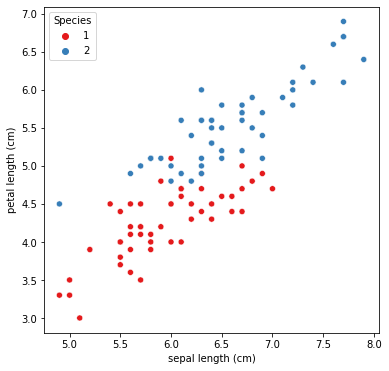

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 6))
# 散布図
sns.scatterplot(data=df_iris, x='sepal length (cm)', y='petal length (cm)', hue='Species', palette='Set1')

<AxesSubplot:>

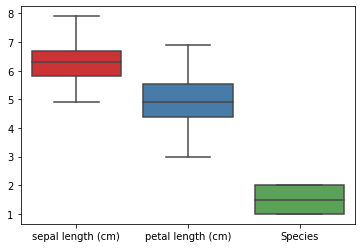

In [187]:
# 箱ひげ図
sns.boxplot(data=df_iris, palette='Set1')

<AxesSubplot:>

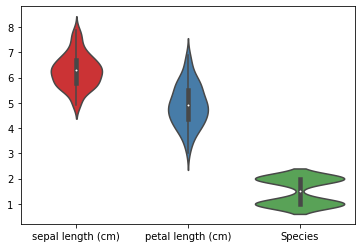

In [188]:
# バイオリン図
sns.violinplot(data=df_iris, palette='Set1')

## 【問題3】前処理・訓練データと検証データの分割
---
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

In [189]:
import numpy as np
from sklearn.model_selection import train_test_split

# 訓練用データとテストデータに分けた後、データをdataFrameからndarrayに変換
X = df_iris.iloc[:, :2].to_numpy()
y = df_iris.iloc[:, -1].to_numpy()

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

print("X_trainのshape：", X_train.shape)
print("X_testのshape：", X_test.shape)
print("y_trainのshape：", y_train.shape)
print("y_testのshape：", y_test.shape)


X_trainのshape： (75, 2)
X_testのshape： (25, 2)
y_trainのshape： (75,)
y_testのshape： (25,)


## 【問題4】前処理・標準化
---
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

In [190]:
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


## 【問題5】学習と推定
---
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。   

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [191]:
from sklearn.neighbors import KNeighborsClassifier

# インスタンスの生成、3つの近傍点で投票を行う
knn_3 = KNeighborsClassifier(n_neighbors=3)

# 学習する
knn_3.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_3 = knn_3.predict(X_test_std)
print("Predict (3-nn): {}".format(y_pred_3))


Predict (3-nn): [2 2 1 1 1 2 1 2 1 2 2 2 1 2 1 1 2 1 1 1 1 1 2 2 2]


In [192]:
# インスタンスの生成、5つの近傍点で投票を行う
knn_5 = KNeighborsClassifier(n_neighbors=5)

# 学習する
knn_5.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_5 = knn_5.predict(X_test_std)
print("Predict (5-nn): {}".format(y_pred_5))


Predict (5-nn): [2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]


In [193]:
# インスタンスの生成、5つの近傍点で投票を行う
knn_1 = KNeighborsClassifier(n_neighbors=1)

# 学習する
knn_1.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_1 = knn_1.predict(X_test_std)
print("Predict (1-nn): {}".format(y_pred_1))


Predict (1-nn): [2 2 1 1 1 1 1 2 1 2 2 2 1 2 1 1 2 1 1 1 1 1 2 2 2]


## 【問題6】評価
---
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

*    scikit-learnを使い4種類の指標を計算する
*    混同行列をscikit-learnを使い表示する
*    4種類の指標値の意味について簡単に調査して文章でまとめる


In [194]:
# 4種類の指標を計算する

# Accuracy（正解率）
from sklearn.metrics import accuracy_score

print('1-nn Accuracy: %.2f' % accuracy_score(y_test, y_pred_1))
print('3-nn Accuracy: %.2f' % accuracy_score(y_test, y_pred_3))
print('5-nn Accuracy: %.2f' % accuracy_score(y_test, y_pred_5))

print("-----------------------")
# Precision（適合率）
from sklearn.metrics import precision_score
print('1-nn Precision: %.2f' % precision_score(y_test, y_pred_1))
print('3-nn Precision: %.2f' % precision_score(y_test, y_pred_3))
print('5-nn Precision: %.2f' % precision_score(y_test, y_pred_5))

print("-----------------------")
# Recall（再現率）
from sklearn.metrics import recall_score
print('1-nn Recall: %.2f' % recall_score(y_test, y_pred_1))
print('3-nn Recall: %.2f' % recall_score(y_test, y_pred_3))
print('5-nn Recall: %.2f' % recall_score(y_test, y_pred_5))

print("-----------------------")
# F値
from sklearn.metrics import f1_score
print('1-nn f1: %.2f' % f1_score(y_test, y_pred_1))
print('3-nn f1: %.2f' % f1_score(y_test, y_pred_3))
print('5-nn f1: %.2f' % f1_score(y_test, y_pred_5))

1-nn Accuracy: 0.88
3-nn Accuracy: 0.92
5-nn Accuracy: 0.96
-----------------------
1-nn Precision: 0.86
3-nn Precision: 0.92
5-nn Precision: 0.93
-----------------------
1-nn Recall: 0.92
3-nn Recall: 0.92
5-nn Recall: 1.00
-----------------------
1-nn f1: 0.89
3-nn f1: 0.92
5-nn f1: 0.96


In [195]:
# 混同行列をscikit-learnを使い表示する
'''
1(versicolor) = Negative, 2(virginica) = Positive
                 Predicted
                 Negative  Positive
Actual Negative     TN        FP
       Positive     FN        TP

'''

from sklearn.metrics import confusion_matrix
print('1-nn f1: \n', confusion_matrix(y_test, y_pred_1))
print('3-nn f1: \n', confusion_matrix(y_test, y_pred_3))
print('5-nn f1: \n', confusion_matrix(y_test, y_pred_5))

1-nn f1: 
 [[12  1]
 [ 2 10]]
3-nn f1: 
 [[12  1]
 [ 1 11]]
5-nn f1: 
 [[13  0]
 [ 1 11]]


###　クラス分類問題における評価指標として以下がある。　

**混同行列**とは、<font color="red">あるデータを分類したときに、その正解・不正解の数を整理しておく表</font>のことです。
表に整理したことによって正解・不正解の状況（分類の精度の良さ）が分かりやすくなるが、精度が何%かは分からない。

**正解率（accuracy）**    

    最も単純な指標です。
    全データのうち、正解したデータ数の割合です。

**適合率（precision）**  

    “判別対象のデータ”を判別した数のうち、それが正解している割合です。
    別名、「陽性適中率(Positive Predictive Value)」とも呼ばれます。

**再現率（recall）** 

    判別したいデータの数のうち、実際に判別できた割合です。
    再現率は、別名「感度(Sensitivity)」や「検出力(Power)」とも呼ばれます。

**F1値（F1-measure）**  

    F値とは、再現率と適合率の調和平均です。
    一般的に再現率と適合率はトレードオフの関係にあります。
    トレードオフとは、「再現率が上がると適合率が下がる」「適合率が上がると再現率が下がる」という関係です。

参考URL：https://qiita.com/Qiita/items/c686397e4a0f4f11683d

## 【問題7】可視化
---
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [196]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.01)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


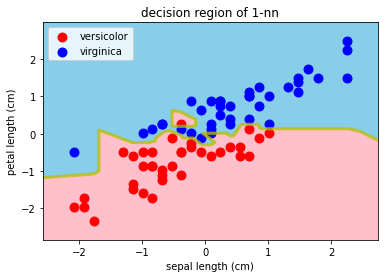

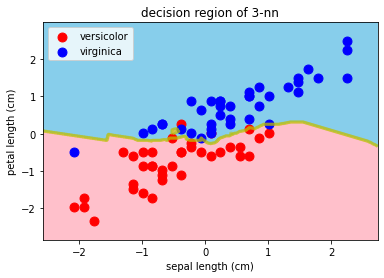

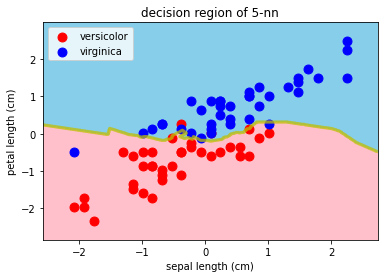

In [197]:
#可視化: 訓練データ
decision_region(X_train_std, y_train, knn_1, title='decision region of 1-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')
decision_region(X_train_std, y_train, knn_3, title='decision region of 3-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')
decision_region(X_train_std, y_train, knn_5, title='decision region of 5-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')


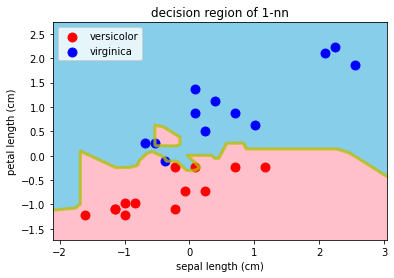

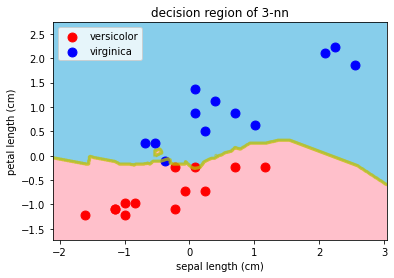

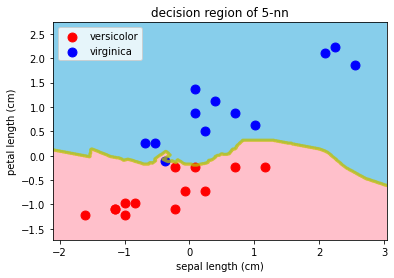

In [198]:
#可視化: 検証データ
decision_region(X_test_std, y_test, knn_1, title='decision region of 1-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')
decision_region(X_test_std, y_test, knn_3, title='decision region of 3-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')
decision_region(X_test_std, y_test, knn_5, title='decision region of 5-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')

### 【問題8】他の手法の学習
---
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

-    最近傍法
-    ロジスティック回帰
-    SVM
-    決定木
-    ランダムフォレスト


In [199]:
# 関数化

def evaluate_performance_model(y_test_data, y_pred_data):
    '''
    検証データと推定したデータからAccuracy, Percision, Recall, F1の指標を計算する関数
    Parameters:
    --------------
        y_test_data : ndarray型
        検証データ
        y_pred_data : ndarray型
        推定データ
    Returns:
    --------------
    None
    '''
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    
    #　推定したデータ
    print("Predict : ", y_pred_data)

    # 4種類の指標を計算する

    # Accuracy（正解率）
    print('Accuracy: \t%.2f' % accuracy_score(y_test_data, y_pred_data))

    # Precision（適合率）
    print('Precision: \t%.2f' % precision_score(y_test_data, y_pred_data))

    # Recall（再現率）
    print('Recall: \t%.2f' % recall_score(y_test_data, y_pred_data))

    # F値
    print('f1: \t\t%.2f' % f1_score(y_test_data, y_pred_data))

>## 最近傍法

Predict :  [2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.96
Precision: 	0.93
Recall: 	1.00
f1: 		0.96


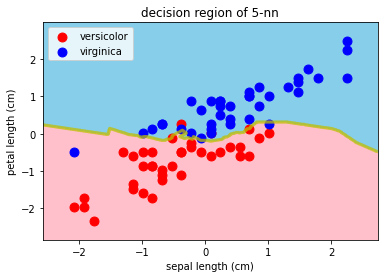

In [200]:
from sklearn.neighbors import KNeighborsClassifier

# インスタンスの生成、5つの近傍点で投票を行う
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_5 = knn_5.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_5)

#可視化
decision_region(X_train_std, y_train, knn_5, title='decision region of 5-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## ロジスティック回帰

----------Logistic Regression-------------
Predict :  [2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.96
Precision: 	0.93
Recall: 	1.00
f1: 		0.96


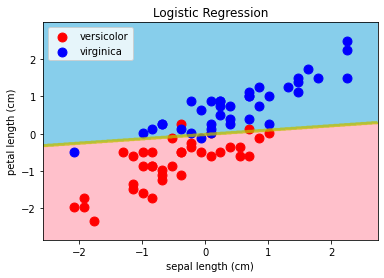

In [201]:
from sklearn.linear_model import LogisticRegression

print("----------Logistic Regression-------------")

# 学習する
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_lr = lr.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_lr)

#可視化
decision_region(X_train_std, y_train, lr, title='Logistic Regression', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## SVM

----------SVM-------------
Predict :  [2 2 1 1 1 2 1 2 1 2 2 1 1 2 2 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	1.00
Precision: 	1.00
Recall: 	1.00
f1: 		1.00


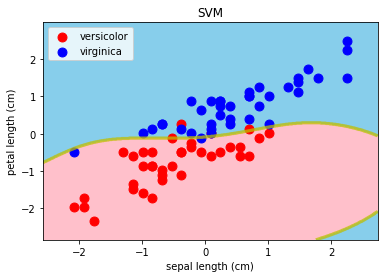

In [202]:
from sklearn import svm

print("----------SVM-------------")

# 学習する
clf = svm.SVC()
clf.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_clf = clf.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_clf)

#可視化
decision_region(X_train_std, y_train, clf, title='SVM', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## 決定木

----------Decision Tree-------------
Predict :  [2 2 1 1 1 1 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.92
Precision: 	0.87
Recall: 	1.00
f1: 		0.93


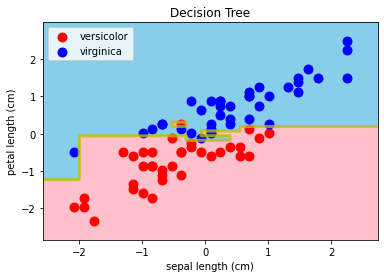

In [203]:
from sklearn.tree import DecisionTreeClassifier

print("----------Decision Tree-------------")

# 学習する
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_tree = tree.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_tree)

#可視化
decision_region(X_train_std, y_train, tree, title='Decision Tree', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## ランダムフォレスト

----------Random Forest-------------
Predict :  [2 2 1 1 1 1 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.92
Precision: 	0.87
Recall: 	1.00
f1: 		0.93


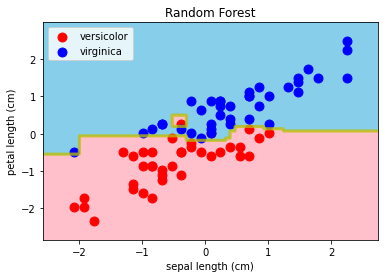

In [204]:
from sklearn.ensemble import RandomForestClassifier

print("----------Random Forest-------------")

# 学習する
RFC = RandomForestClassifier()
RFC.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_rfc = RFC.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_rfc)

#可視化
decision_region(X_train_std, y_train, RFC, title='Random Forest', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>### 各モデルの指標値の表

|                    | Accuracy | Precision | Recall | F1   | 
| ------------------ | -------- | --------- | ------ | ---- | 
| 最近傍法           | 0.92     | 0.86      | 1.00   | 0.92 | 
| ロジスティック回帰 | 0.92     | 0.86      | 1.00   | 0.92 | 
| SVM                | 0.92     | 0.86      | 1.00   | 0.92 | 
| 決定木             | 0.84     | 0.79      | 0.92   | 0.85 | 
| ランダムフォレスト | 0.88     | 0.80      | 1.00   | 0.89 | 


>### 結果の考察

    最近傍法、ロジスティック回帰、SVMの3つのモデルの指標値は全て同じ値で、且つ一番良いの結果となった。
    決定領域に関しては、ロジスティック回帰と決定木は直線なのに対して、最近傍法、SVM、ランダムフォレストは曲線のグラフになっている。また、決定木は外れ値の影響を大きく受けやすい傾向にあると思われる。


## 【問題9】（アドバンス課題）標準化の有無の比較
---
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

>## 最近傍法

----------3-nn KNeighbors-------------
Predict :  [2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.96
Precision: 	0.93
Recall: 	1.00
f1: 		0.96


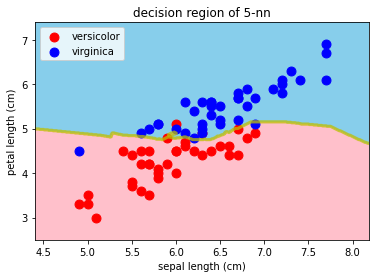

In [205]:
from sklearn.neighbors import KNeighborsClassifier

print("----------3-nn KNeighbors-------------")

# インスタンスの生成、5つの近傍点で投票を行う
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

# 検証データで推定を行う
y_pred_5 = knn_5.predict(X_test)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_lr)

#可視化
decision_region(X_train, y_train, knn_5, title='decision region of 5-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## ロジスティック回帰

----------Logistic Regression-------------
Predict :  [2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.96
Precision: 	0.93
Recall: 	1.00
f1: 		0.96


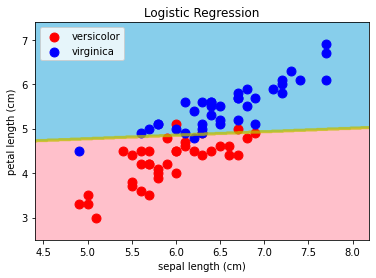

In [206]:
from sklearn.linear_model import LogisticRegression

print("----------Logistic Regression-------------")

# 学習する
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 検証データで推定を行う
y_pred_lr = lr.predict(X_test)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_lr)

#可視化
decision_region(X_train, y_train, lr, title='Logistic Regression', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## SVM

----------SVM-------------
Predict :  [2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.96
Precision: 	0.93
Recall: 	1.00
f1: 		0.96


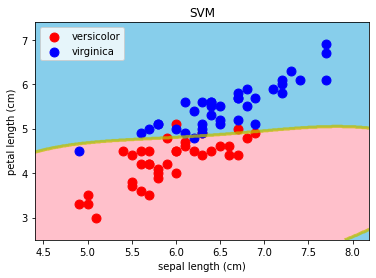

In [207]:
from sklearn import svm

print("----------SVM-------------")

# 学習する
clf = svm.SVC()
clf.fit(X_train, y_train)

# 検証データで推定を行う
y_pred_clf = clf.predict(X_test)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_clf)

#可視化
decision_region(X_train, y_train, clf, title='SVM', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## 決定木

----------Decision Tree-------------
Predict :  [2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.96
Precision: 	0.93
Recall: 	1.00
f1: 		0.96


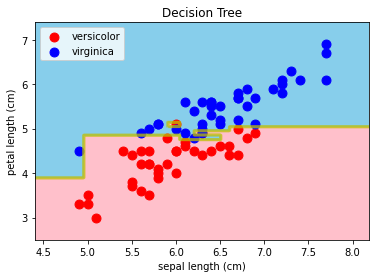

In [208]:
from sklearn.tree import DecisionTreeClassifier

print("----------Decision Tree-------------")

# 学習する
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# 検証データで推定を行う
y_pred_tree = tree.predict(X_test)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_tree)

#可視化
decision_region(X_train, y_train, tree, title='Decision Tree', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## ランダムフォレスト

----------Random Forest-------------
Predict :  [2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 	0.96
Precision: 	0.93
Recall: 	1.00
f1: 		0.96


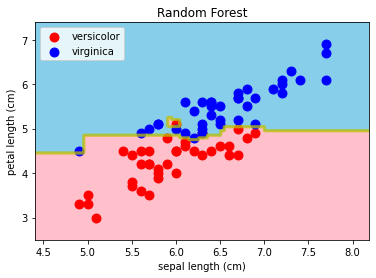

In [209]:
from sklearn.ensemble import RandomForestClassifier

print("----------Random Forest-------------")

# 学習する
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

# 検証データで推定を行う
y_pred_rfc = RFC.predict(X_test)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_rfc)

#可視化
decision_region(X_train, y_train, RFC, title='Random Forest', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>### 各モデルの指標値の表 (標準化)

|                    | Accuracy | Precision | Recall | F1   | 
| ------------------ | -------- | --------- | ------ | ---- | 
| 最近傍法           | 0.92     | 0.86      | 1.00   | 0.92 | 
| ロジスティック回帰 | 0.92     | 0.86      | 1.00   | 0.92 | 
| SVM                | 0.92     | 0.86      | 1.00   | 0.92 | 
| 決定木             | 0.84     | 0.79      | 0.92   | 0.85 | 
| ランダムフォレスト | 0.88     | 0.80      | 1.00   | 0.89 | 

>### 各モデルの指標値の表

|                    | Accuracy | Precision | Recall | F1   | 
| ------------------ | -------- | --------- | ------ | ---- | 
| 最近傍法           | 0.92     | 0.86      | 1.00   | 0.92 | 
| ロジスティック回帰 | 0.92     | 0.86      | 1.00   | 0.92 | 
| SVM                | 0.92     | 0.86      | 1.00   | 0.92 | 
| 決定木             | 0.88     | 0.85      | 0.92   | 0.88 | 
| ランダムフォレスト | 0.96     | 0.92      | 1.00   | 0.96 | 



	

![決定領域の比較](./model_comp.png) 
	



>### 比較した結果の考察

    訓練データを標準化した場合としない場合の指標値を比較すると、最近傍法、ロジスティック回帰、SVMの3つは同じだが
    決定木とランダムフォレストに関しては値が異なるり、標準化をしない方がより高い評価になっている。

    決定領域に関しては、標準化をしたが方がより精度が高いように思う。
    特にSVMモデルはそれが顕著である。
    
    前処理の標準化は計算や解析において扱いやすくし、学習速度をあげれること。前処理の標準化は計算や解析において扱いやすくし、学習速度をあげれること。

## 【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法
---
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類すべてを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。

《多値になることでの変更点》

指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。

決定領域を可視化する前述の関数は適切に書き換える必要があります。

In [210]:
# 3種類すべてを使ったデータの抽出

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
series1 = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([df,series1], axis=1)

df_iris = df.iloc[:, [0,2,4]]
df_iris


,sepal length (cm),petal length (cm),Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

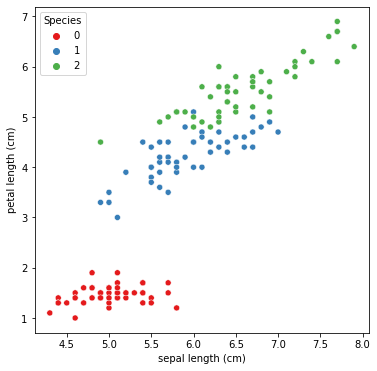

In [211]:
# 散布図

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 6))
# 散布図
sns.scatterplot(data=df_iris, x='sepal length (cm)', y='petal length (cm)', hue='Species', palette='Set1')

In [212]:
# 訓練データと検証データの分割

import numpy as np
from sklearn.model_selection import train_test_split

# 訓練用データとテストデータに分けた後、データをdataFrameからndarrayに変換
X = df_iris.iloc[:, :2].to_numpy()
y = df_iris.iloc[:, -1].to_numpy()

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

print("X_trainのshape：", X_train.shape)
print("X_testのshape：", X_test.shape)
print("y_trainのshape：", y_train.shape)
print("y_testのshape：", y_test.shape)

X_trainのshape： (112, 2)
X_testのshape： (38, 2)
y_trainのshape： (112,)
y_testのshape： (38,)


In [213]:
# 前処理・標準化

from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print("X_train_stdのshape：", X_train_std.shape)
print("X_test_stdのshape：", X_test_std.shape)

X_train_stdのshape： (112, 2)
X_test_stdのshape： (38, 2)


In [214]:
# 関数化

def evaluate_performance_model_with_micro_ave(y_test_data, y_pred_data):
    '''
    検証データと推定したデータからAccuracy, Percision, Recall, F1の指標を計算する関数
    Parameters:
    --------------
        y_test_data : ndarray型
        検証データ
        y_pred_data : ndarray型
        推定データ
    Returns:
    --------------
    None
    '''
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    
    #　推定したデータ
    print("Predict : ", y_pred_data)

    # 4種類の指標を計算する

    # Accuracy（正解率）
    print('Accuracy: \t%.2f' % accuracy_score(y_test_data, y_pred_data))

    # Precision（適合率）
    print('Precision: \t%.2f' % precision_score(y_test_data, y_pred_data, average='micro'))

    # Recall（再現率）
    print('Recall: \t%.2f' % recall_score(y_test_data, y_pred_data, average='micro'))

    # F値
    print('f1: \t\t%.2f' % f1_score(y_test_data, y_pred_data, average='micro'))

In [215]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region_for_3species(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.01)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['lightgreen', 'pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
        
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


>## 最近傍法

Predict :  [0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]
Accuracy: 	1.00
Precision: 	1.00
Recall: 	1.00
f1: 		1.00


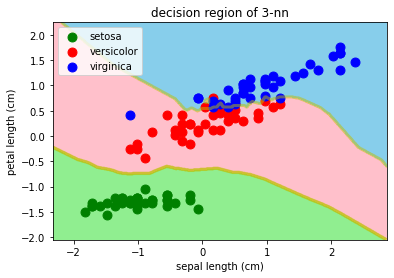

In [216]:
from sklearn.neighbors import KNeighborsClassifier

# インスタンスの生成、5つの近傍点で投票を行う
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_3 = knn_3.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model_with_micro_ave(y_test, y_pred_3)

#可視化
decision_region_for_3species(X_train_std, y_train, knn_3, title='decision region of 3-nn', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## ロジスティック回帰

----------Logistic Regression-------------
Predict :  [0 0 0 0 1 1 1 0 1 2 2 1 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 1 0 2 2
 2]
Accuracy: 	0.92
Precision: 	0.92
Recall: 	0.92
f1: 		0.92


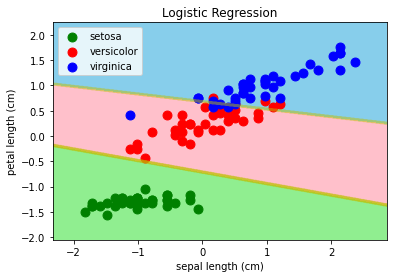

In [217]:
from sklearn.linear_model import LogisticRegression

print("----------Logistic Regression-------------")

# 学習する
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_lr = lr.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model_with_micro_ave(y_test, y_pred_lr)

#可視化
decision_region_for_3species(X_train_std, y_train, lr, title='Logistic Regression', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## SVM

----------SVM-------------
Predict :  [0 0 0 0 1 1 1 0 1 2 2 1 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 1 0 1 2
 2]
Accuracy: 	0.95
Precision: 	0.95
Recall: 	0.95
f1: 		0.95


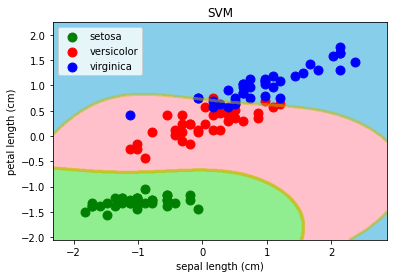

In [218]:
from sklearn import svm

print("----------SVM-------------")

# 学習する
clf = svm.SVC()
clf.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_clf = clf.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model_with_micro_ave(y_test, y_pred_clf)

#可視化
decision_region_for_3species(X_train_std, y_train, clf, title='SVM', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## 決定木

----------Decision Tree-------------
Predict :  [0 0 0 0 1 1 1 0 1 2 2 1 1 2 1 0 0 2 0 1 1 1 1 0 2 0 0 1 2 1 0 1 2 1 0 1 2
 2]
Accuracy: 	0.92
Precision: 	0.92
Recall: 	0.92
f1: 		0.92


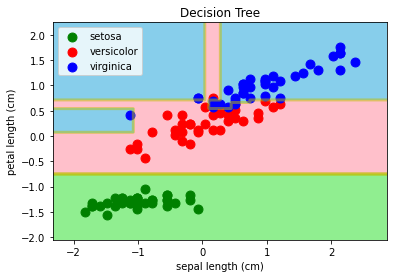

In [219]:
from sklearn.tree import DecisionTreeClassifier

print("----------Decision Tree-------------")

# 学習する
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_tree = tree.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model_with_micro_ave(y_test, y_pred_tree)

#可視化
decision_region_for_3species(X_train_std, y_train, tree, title='Decision Tree', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>## ランダムフォレスト

----------Random Forest-------------
Predict :  [0 0 0 0 1 1 1 0 1 2 2 1 1 2 1 0 0 2 0 1 1 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]
Accuracy: 	0.95
Precision: 	0.95
Recall: 	0.95
f1: 		0.95


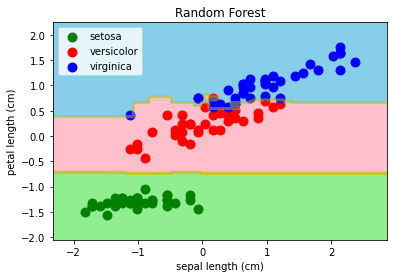

In [220]:
from sklearn.ensemble import RandomForestClassifier

print("----------Random Forest-------------")

# 学習する
RFC = RandomForestClassifier()
RFC.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_rfc = RFC.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model_with_micro_ave(y_test, y_pred_rfc)

#可視化
decision_region_for_3species(X_train_std, y_train, RFC, title='Random Forest', xlabel='sepal length (cm)', ylabel='petal length (cm)')

>### 各モデルの指標値の表

|                    | Accuracy | Precision | Recall | F1   | 
| ------------------ | -------- | --------- | ------ | ---- | 
| 最近傍法           | 1.00     | 1.00      | 1.00   | 1.00 | 
| ロジスティック回帰 | 0.92     | 0.92      | 0.92   | 0.92 | 
| SVM                | 0.95     | 0.95      | 0.95   | 0.95 | 
| 決定木             | 0.92     | 0.92      | 0.92   | 0.92 | 
| ランダムフォレスト | 0.95     | 0.95      | 0.95   | 0.95 | 


>### 結果の考察

    最近傍法が最も分類の精度が高く、ロジスティック回帰と決定木が試した手法の中では最も低い結果となった。
